## Open Street Map for TODs

For our final project, we want to analyze specifically two TOD stations, and having the Open Street Map for each station could help us identify the surrounding landuse.

In [2]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Search the geography here
https://nominatim.openstreetmap.org/ui/search.html

#### Del Amo Station

In [4]:
address = 'Del Amo Station, Los Angeles, CA'

In [5]:
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

In [6]:
osm.sample(10)

nodes  \
element_type osmid                                                          
way          441263874  [4390258948, 4390258956, 4390258947, 439025893...   
             351881325  [3576778748, 3576778749, 3576778750, 357677875...   
             441065181  [4388282373, 4388282221, 4388282218, 438828220...   
             441209971  [4389727660, 4389727666, 4389727320, 438972731...   
relation     6567261    [[[4389722804, 4389722824, 4389722825, 4389722...   
way          441446985  [4391865371, 4391865349, 4391865350, 439186528...   
             441210396  [4389727943, 4389727935, 4389727997, 438972799...   
             441207574  [4389725676, 4389725679, 4389725642, 438972564...   
             441207382  [4389725038, 4389725036, 4389725100, 438972508...   
             441445300  [4391865438, 4391865397, 4391865399, 439186539...   

                           building   ele height lacounty:ain lacounty:bld_id  \
element_type osmid                                                              
way          441263874   industrial  17.9    7.6   7306023028    494396764192   
             351881325    warehouse  19.4    7.5   7306011025    497418765930   
             441065181        house  17.1    3.3   7132021002    500728767898   
             441209971  residential  57.6    4.5   7318010027    494221770149   
relation     6567261     industrial  20.8    7.2   7306006046    495742769011   
way          441446985  residential  15.1    3.7   7133018002    500723765938   
             441210396  residential  57.0    3.9   7318010027    494207770290   
             441207574          yes  55.1    4.6   7318010025    494248769685   
             441207382          yes  53.4    4.3   7318010025    494431769606   
             441445300  residential  14.9    3.3   7133018002    500456765985   

                       start_date  \
element_type osmid                  
way          441263874       1946   
             351881325       1989   
             441065181       1947   
             441209971       1980   
relation     6567261         1960   
way          441446985       1944   
             441210396       1980   
             441207574        NaN   
             441207382        NaN   
             441445300       1944   

                                                                 geometry  \
element_type osmid                                                          
way          441263874  POLYGON ((-118.22191 33.83997, -118.22188 33.8...   
             351881325  POLYGON ((-118.21186 33.84485, -118.21186 33.8...   
             441065181  POLYGON ((-118.20067 33.85016, -118.20067 33.8...   
             441209971  POLYGON ((-118.22223 33.85634, -118.22208 33.8...   
relation     6567261    POLYGON ((-118.21683 33.85338, -118.21673 33.8...   
way          441446985  POLYGON ((-118.20062 33.84477, -118.20062 33.8...   
             441210396  POLYGON ((-118.22210 33.85660, -118.22224 33.8...   
             441207574  POLYGON ((-118.22213 33.85508, -118.22206 33.8...   
             441207382  POLYGON ((-118.22136 33.85473, -118.22146 33.8...   
             441445300  POLYGON ((-118.20151 33.84488, -118.20151 33.8...   

                       building:units building:use  ... addr:postcode  \
element_type osmid                                  ...                 
way          441263874            NaN          NaN  ...           NaN   
             351881325            NaN          NaN  ...           NaN   
             441065181              1          NaN  ...           NaN   
             441209971             50          NaN  ...           NaN   
relation     6567261              NaN          NaN  ...           NaN   
way          441446985              3          NaN  ...           NaN   
             441210396             50          NaN  ...           NaN   
             441207574            NaN          NaN  ...           NaN   
             441207382            NaN          NaN  ...           NaN 

In [7]:
# subsetting data
columns_to_keep = ['geometry','building','height']
osm = osm[columns_to_keep]
osm.sample(10)

geometry  \
element_type osmid                                                          
way          441263709  POLYGON ((-118.21605 33.84582, -118.21591 33.8...   
             441445589  POLYGON ((-118.20054 33.85307, -118.20054 33.8...   
             441446922  POLYGON ((-118.20044 33.84366, -118.20044 33.8...   
             441208343  POLYGON ((-118.21544 33.85358, -118.21545 33.8...   
             441208137  POLYGON ((-118.22109 33.85484, -118.22109 33.8...   
             441207320  POLYGON ((-118.22180 33.85409, -118.22160 33.8...   
             441446171  POLYGON ((-118.20129 33.84389, -118.20127 33.8...   
             441447262  POLYGON ((-118.20136 33.84343, -118.20136 33.8...   
             441446136  POLYGON ((-118.20080 33.84511, -118.20080 33.8...   
             441209491  POLYGON ((-118.20489 33.85582, -118.20489 33.8...   

                           building height  
element_type osmid                          
way          441263709    warehouse    9.5  
             441445589        house    2.6  
             441446922  residential    3.9  
             441208343    warehouse    6.5  
             441208137          yes    4.5  
             441207320          yes    4.4  
             441446171          yes    NaN  
             441447262        house    4.5  
             441446136  residential    3.6  
             441209491    warehouse    5.9

In [8]:
osm_building_counts = osm.building.value_counts()
osm_building_counts

residential    139
warehouse      121
yes            115
industrial      85
house           53
commercial       9
apartments       7
retail           1
factory          1
no               1
Name: building, dtype: int64

In [9]:
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

,building
residential,139
warehouse,121
yes,115
industrial,85
house,53
commercial,9
apartments,7
retail,1
factory,1
no,1


In [10]:
# reset the index
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,residential,139
1,warehouse,121
2,yes,115
3,industrial,85
4,house,53
5,commercial,9
6,apartments,7
7,retail,1
8,factory,1
9,no,1


In [11]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

,building_type,count
0,residential,139
1,warehouse,121
2,yes,115
3,industrial,85
4,house,53
5,commercial,9
6,apartments,7
7,retail,1
8,factory,1
9,no,1


<AxesSubplot:>

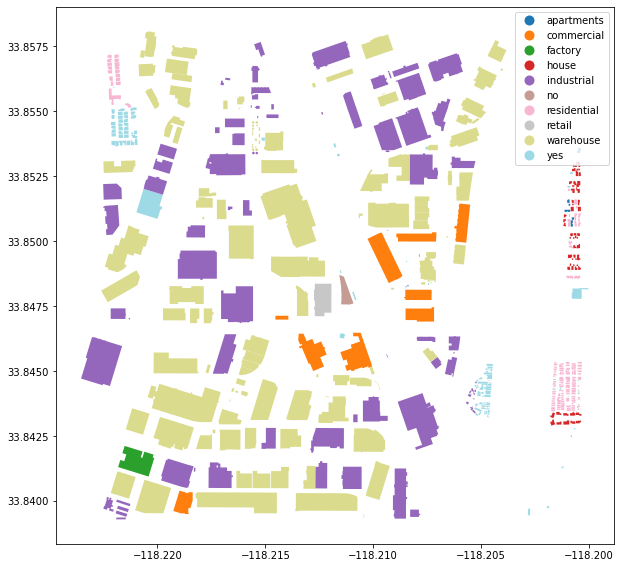

In [12]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [13]:
osm_web_mercator = osm.to_crs(epsg=3857)

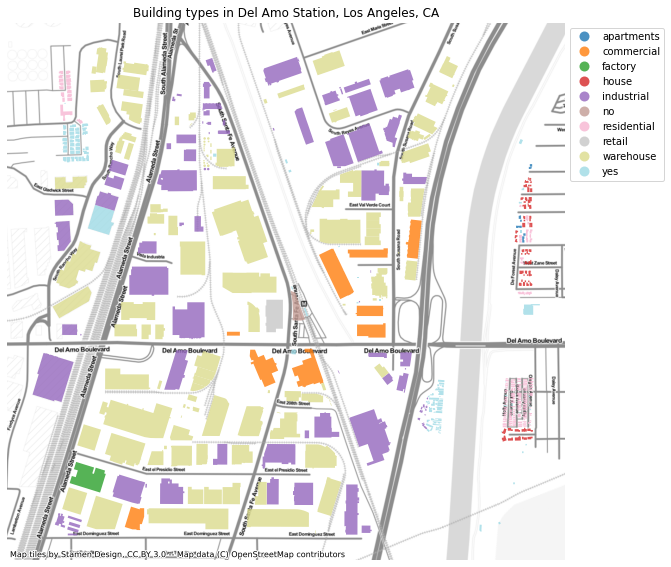

In [14]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    column='building',
                    cmap='tab20',
                    legend=True,
                    alpha=0.8,
                    legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.set_title('Building types in Del Amo Station, Los Angeles, CA')

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

## Function for inputting different TOD location

In [15]:
def make_building_map(location):
    
    # get the data from osm
    osm = ox.geometries_from_address(location,
                                     tags={'building':True},
                                     dist=500)
    
    # reproject to Web Mercator
    osm_web_mercator = osm.to_crs(epsg=3857)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(10,10))
    
    # add the map
    osm_web_mercator.plot(ax=ax,
                            column='building',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
    
    # add a title
    ax.set_title('Building types in ' + location)

    # get rid of the axis
    ax.axis('off')
    
    # add a dark basemap
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

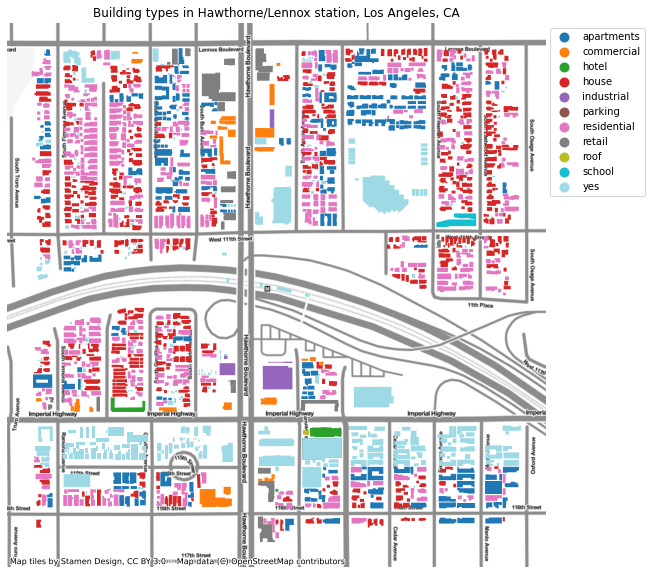

In [16]:
make_building_map('Hawthorne/Lennox station, Los Angeles, CA')

We see that there are mostly houses and residential uses around the Hawthrone station, and it is right next the highway.

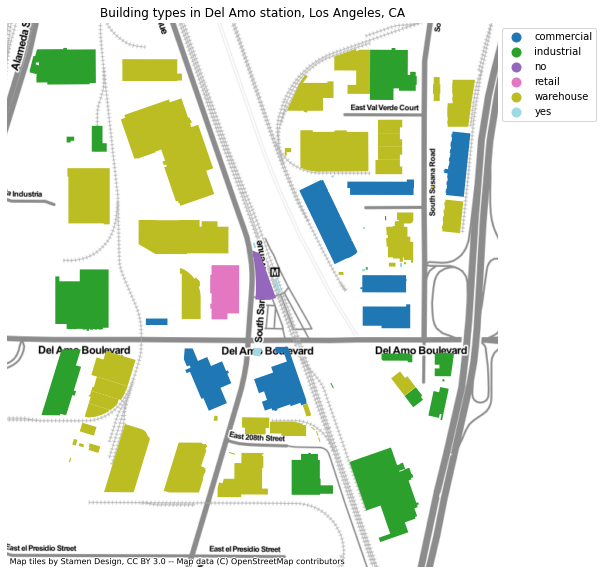

In [17]:
make_building_map('Del Amo station, Los Angeles, CA')

When we see the surroundings of the Del Amo station, we see there are mostly warehoused and industiral uses. 

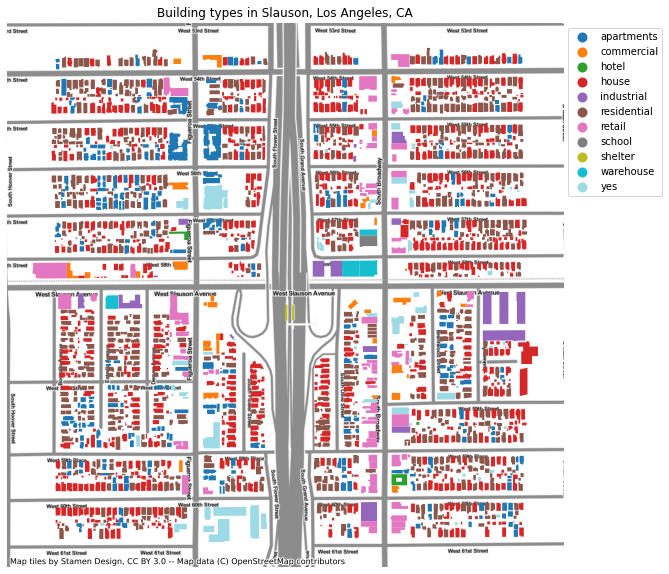

In [18]:
make_building_map('Slauson, Los Angeles, CA')

Slauson station has the majority of house and residential uses.